# Imports

In [1]:
!pip install pydmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
import numpy as np
from PIL import Image
from PIL import ImageFilter
import os
from pydmd import DMD

%matplotlib inline


# Reading Images

In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
destination_path = '/content/drive/MyDrive/ML_Term_Project/project_data'   #PLEASE CHANGE THE PATH VARIABLES CORRESPONDING TO IMAGE FOLDERS ON YOUR LOCAL MACHINES
target_path = '/content/drive/MyDrive/ML_Term_Project/pre_processed'

format_of_your_images = 'jpg'

all_the_files = Path(destination_path).rglob(f'*.{format_of_your_images}')

for f in all_the_files:
   p = cv2.imread(str(f))
   #  transformation
   gray_image = cv2.cvtColor(p, cv2.COLOR_BGR2GRAY)
   resized = cv2.resize(gray_image, (96,120),interpolation = cv2.INTER_AREA) #resizing images to dimension (96,120)
   cv2.imwrite(f'{target_path}/{f.name}', resized)
     

The Pre_processed data only contains the down sampled gray scale
 images

**DOWN SAMPLED GRAY SCALED IMAGES DONE**

In [4]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray
 
 
# load the image and convert into
# numpy array
img = Image.open('/content/drive/MyDrive/ML_Term_Project/pre_processed/in000051.jpg')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

print(numpydata)

<class 'numpy.ndarray'>
(120, 96)
[[ 39  35  25 ...  28  46  99]
 [ 30  34  37 ... 164 169 189]
 [ 57  29  27 ... 186 187 185]
 ...
 [ 79 111 103 ... 106 116 105]
 [130 123 132 ... 110 106  98]
 [ 86  78  61 ... 119 102 100]]


## Checking Values

In [5]:
array2 = numpydata.flatten()
#Memory occupied by array 2
print(array2.shape)
#displaying the 1-D array
print(array2)

(11520,)
[ 39  35  25 ... 119 102 100]


In [6]:
array3=array2
print(array3)

[ 39  35  25 ... 119 102 100]


In [7]:
np.c_[array2, array3].shape

(11520, 2)

# Creating X matrix with snapshots of images arranged column wise

In [8]:
inPath ="/content/drive/MyDrive/ML_Term_Project/pre_processed"

X = np.zeros(11520) 


  
for imagePath in os.listdir(inPath):

  inputPath = os.path.join(inPath, imagePath)
  
  # inputPath contains the full directory name
  img = Image.open(inputPath)
  
  np_img = asarray(img)   #converting image to an numpy array
  f_np_img = np_img.flatten()  #converting each image into a vector of size 11520

  X = np.c_[X,f_np_img] #stacking images columnwise

X = X[:,1:]  #dropping the first column consisting of zeroes


In [9]:
X.shape

(11520, 30)

**Saving the X matrix as a csv file for later use**

In [13]:
df = pd.DataFrame(X)
df.to_csv('/content/drive/MyDrive/ML_Term_Project/snapshots.csv',index=False)

# Performing DMD on our X matrix

In [14]:

df_f = pd.read_csv('/content/drive/MyDrive/ML_Term_Project/snapshots.csv')
X = df_f.to_numpy()

In [15]:
X.shape

(11520, 30)

In [16]:
X = X.T

In [17]:
X.shape

(30, 11520)

In [77]:
dmd = DMD(svd_rank=2, tlsq_rank=2, exact=True, opt=True)  #using the pyDMD package with svd rank of 2
dmd.fit(X.T)

In [78]:
#dmd.plot_modes_2D(figsize=(12,5))
mode = dmd.modes

(array([2053., 1479., 1672., 3738., 2435.,   73.,   30.,   20.,    9.,
          11.]),
 array([2.52934359e-05, 2.93008260e-03, 5.83487177e-03, 8.73966094e-03,
        1.16444501e-02, 1.45492393e-02, 1.74540284e-02, 2.03588176e-02,
        2.32636068e-02, 2.61683959e-02, 2.90731851e-02]),
 <a list of 10 Patch objects>)

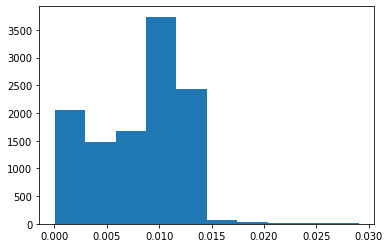

In [79]:
plt.hist(abs(mode[:,0]))


Reconstructed Image

Text(0.5, 1.0, 'Reconstructed Image')

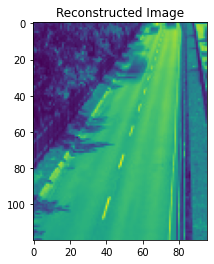

In [80]:
plt.hist(abs(mode[:,0]))
xdmd = dmd.reconstructed_data
xdmd=xdmd.T
plt.imshow(abs(xdmd[10].reshape(120,96)));
plt.title("Reconstructed Image")

Foreground part of the image

Text(0.5, 1.0, 'Foreground Image')

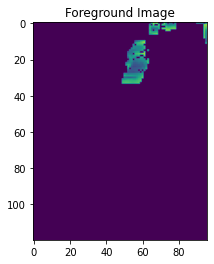

In [81]:
ind = np.where( abs(mode[:,1])<=0.0125)  #threshold value of 0.0125 is used here
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Foreground Image")

Background part of the image

Text(0.5, 1.0, 'Background Image')

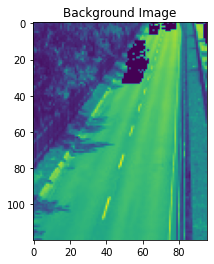

In [82]:
ind = np.where( abs(mode[:,1])>=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Background Image")

In [39]:
type(sparse[1].reshape(120,96))

numpy.ndarray

# Script for saving the Reconstructed Images in a folder

In [37]:
#Creating and Storing Reconstructed images

destination_path = '/content/drive/MyDrive/ML_Term_Project/project_data'
target_path = '/content/drive/MyDrive/ML_Term_Project/Reconstructed_images'

format_of_your_images = 'jpg'
i=0
all_the_files = Path(destination_path).rglob(f'*.{format_of_your_images}')

for f in all_the_files:
   reconstructed = abs(xdmd[i].reshape(120,96))
   i=i+1
   plt.imsave(f'{target_path}/{f.name}', reconstructed)
   


# Script for saving the Foreground part of the images in a folder

In [40]:
#Creating and Storing Foreground images

destination_path = '/content/drive/MyDrive/ML_Term_Project/project_data'
target_path = '/content/drive/MyDrive/ML_Term_Project/Foreground_images'

format_of_your_images = 'jpg'

all_the_files = Path(destination_path).rglob(f'*.{format_of_your_images}')

for f in all_the_files:
  xdmd = dmd.reconstructed_data
  xdmd=xdmd.T
  #plt.imshow(abs(xdmd[10].reshape(120,96)));
  ind = np.where( abs(mode[:,1])<=0.0125)
  sparse = xdmd.copy()
  ind[0].shape
  sparse[1,ind] = 0
  #plt.imshow(abs(sparse[1].reshape(120,96)));
  foreground = abs(sparse[1].reshape(120,96))
  plt.imsave(f'{target_path}/{f.name}', foreground)
   

# Script for saving the Background part of images in a folder

In [41]:
#Creating and Storing Background images

destination_path = '/content/drive/MyDrive/ML_Term_Project/project_data'
target_path = '/content/drive/MyDrive/ML_Term_Project/Background_images'

format_of_your_images = 'jpg'

all_the_files = Path(destination_path).rglob(f'*.{format_of_your_images}')

for f in all_the_files:
  xdmd = dmd.reconstructed_data
  xdmd=xdmd.T
  #plt.imshow(abs(xdmd[10].reshape(120,96)));
  ind = np.where( abs(mode[:,1])>=0.0125)
  sparse = xdmd.copy()
  ind[0].shape
  sparse[1,ind] = 0
  #plt.imshow(abs(sparse[1].reshape(120,96)));
  background = abs(sparse[1].reshape(120,96))
  plt.imsave(f'{target_path}/{f.name}', background)
   

# Performing DMD for different values of SVD rank

In [83]:
X.shape

(30, 11520)

## SVD rank=5

In [84]:
dmd = DMD(svd_rank=5, tlsq_rank=2, exact=True, opt=True)
dmd.fit(X.T)
mode = dmd.modes

Reconstructed Image

Text(0.5, 1.0, 'Reconstructed Image')

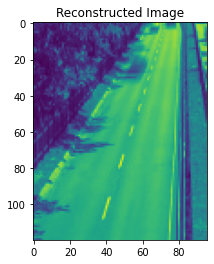

In [85]:
plt.hist(abs(mode[:,0]))
xdmd = dmd.reconstructed_data
xdmd=xdmd.T
plt.imshow(abs(xdmd[10].reshape(120,96)));
plt.title("Reconstructed Image")

Foreground

Text(0.5, 1.0, 'Foreground Image')

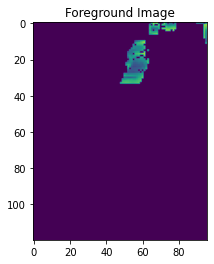

In [86]:
ind = np.where( abs(mode[:,1])<=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Foreground Image")

Background

Text(0.5, 1.0, 'Background Image')

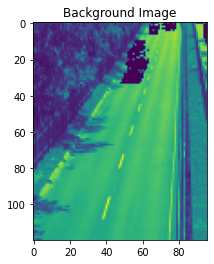

In [87]:
ind = np.where( abs(mode[:,1])>=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Background Image")

## SVD rank=10

In [88]:
dmd = DMD(svd_rank=10, tlsq_rank=2, exact=True, opt=True)
dmd.fit(X.T)
mode = dmd.modes

Reconstructed

Text(0.5, 1.0, 'Reconstructed Image')

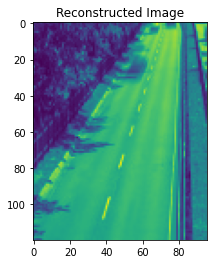

In [89]:
plt.hist(abs(mode[:,0]))
xdmd = dmd.reconstructed_data
xdmd=xdmd.T
plt.imshow(abs(xdmd[10].reshape(120,96)));
plt.title("Reconstructed Image")

Foreground

Text(0.5, 1.0, 'Foreground Image')

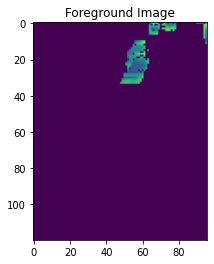

In [90]:
ind = np.where( abs(mode[:,1])<=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Foreground Image")

Background

Text(0.5, 1.0, 'Background Image')

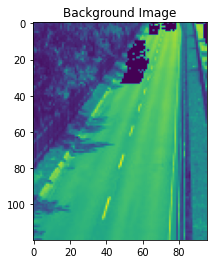

In [91]:
ind = np.where( abs(mode[:,1])>=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Background Image")

## SVD rank = 29

In [92]:
dmd = DMD(svd_rank=29, tlsq_rank=2, exact=True, opt=True)
dmd.fit(X.T)
mode = dmd.modes

Reconstructed

Text(0.5, 1.0, 'Reconstructed Image')

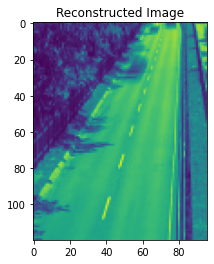

In [93]:
plt.hist(abs(mode[:,0]))
xdmd = dmd.reconstructed_data
xdmd=xdmd.T
plt.imshow(abs(xdmd[10].reshape(120,96)));
plt.title("Reconstructed Image")

Foreground

Text(0.5, 1.0, 'Foreground Image')

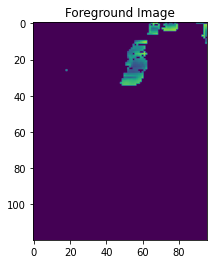

In [94]:
ind = np.where( abs(mode[:,1])<=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Foreground Image")

Background

Text(0.5, 1.0, 'Background Image')

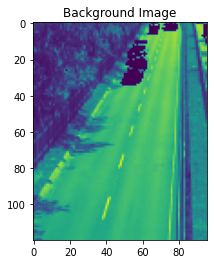

In [95]:
ind = np.where( abs(mode[:,1])>=0.0125)
sparse = xdmd.copy()
ind[0].shape
sparse[1,ind] = 0
plt.imshow(abs(sparse[1].reshape(120,96)));
plt.title("Background Image")